In [1]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_pickle('./Data_Generation/df_pickle/question-context-20-emb.pkl')

In [3]:
raw_data

,index,context,question,question_embedding,context_embedding
0,0,How can we build intelligent machines? More t...,What was the subject of Alan Turing's famous e...,"[tensor(-0.0308), tensor(-0.0802), tensor(-0.3...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
1,1,How can we build intelligent machines? More t...,How did Alan Turing suggest we approach the qu...,"[tensor(0.0078), tensor(-0.1214), tensor(-0.32...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
2,2,How can we build intelligent machines? More t...,What did Alan Turing propose as an alternative...,"[tensor(-0.1040), tensor(-0.2294), tensor(-0.3...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
3,3,How can we build intelligent machines? More t...,What did Turing suggest we should do instead o...,"[tensor(0.0062), tensor(-0.0955), tensor(-0.22...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
4,4,How can we build intelligent machines? More t...,How did Turing propose we should build a human...,"[tensor(-0.0133), tensor(-0.1910), tensor(-0.2...","[tensor(0.0259), tensor(-0.1784), tensor(-0.19..."
...,...,...,...,...,...
3195,15,Our third measure of cluster similarity is ba...,What is the Gaussian mixture-model used for?,"[tensor(-0.1037), tensor(-0.5570), tensor(-0.2...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."
3196,16,Our third measure of cluster similarity is ba...,What is the EM algorithm used for in the conte...,"[tensor(7.8840e-05), tensor(-0.7687), tensor(-...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."
3197,17,Our third measure of cluster similarity is ba...,Who is credited with first using mixture model...,"[tensor(0.1196), tensor(-0.2591), tensor(-0.30...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."
3198,18,Our third measure of cluster similarity is ba...,When was the EM algorithm first named?,"[tensor(0.1602), tensor(-0.6306), tensor(-0.31...","[tensor(-0.1904), tensor(-0.9128), tensor(-0.1..."


In [4]:
df = pd.DataFrame( [{"question": tuple([row['question'], row['question_embedding']]) , "context": tuple([row['context'], row['context_embedding']] )} for _, row in raw_data.iterrows()])

In [5]:

# create a sample dataframe
#raw_data = pd.DataFrame({'question': ['What is your name?', 'What is your age?',"what is 2+3","what is 2+3",3],
#                   'context': ['My name is Stephen Hawking.', 'I am 76 years old.',5,"the number 5",3]})


# Assuming you have a DataFrame called df with 4 columns 'question' 'answer' and embeddings for both
questions = df['question'].unique()
answers = df['context'].unique()

# Create a dictionary with question-answer pairs as keys and 1 as the value and also add their embeddings
original_pairs = {(row['question'], row['context']): 1 for _, row in df.iterrows()}
# Generate all possible combinations and check if they are in the original_pairs dictionary and add their embeddings which should not be the product of the embeddings of the question and answer
df = pd.DataFrame([(q, c, original_pairs.get((q, c,), 0)) for q, c in product(questions, answers)], columns=['question', 'context', 'label'])

In [6]:
df

,question,context,label
0,(What was the subject of Alan Turing's famous ...,( How can we build intelligent machines? More ...,1
1,(What was the subject of Alan Turing's famous ...,( Machine learning is the implementation of Tu...,0
2,(What was the subject of Alan Turing's famous ...,( Data mining refers to the discovery of patte...,0
3,(What was the subject of Alan Turing's famous ...,( Artificial intelligence is the construction ...,0
4,(What was the subject of Alan Turing's famous ...,( Machine learning draws on a number of discip...,0
...,...,...,...
506395,(What is the goal of density estimation and ho...,(10.1.3 Cross-validation for quantifying gener...,0
506396,(What is the goal of density estimation and ho...,(10.1.4 Cross-validation for model selection W...,0
506397,(What is the goal of density estimation and ho...,(10.1.5 Two-layer cross-validation Let’s turn ...,0
506398,(What is the goal of density estimation and ho...,(The Apriori algorithm is very efficient at id...,0


In [7]:
test_q = np.random.choice(df['question'].unique(), size = int(len(df['question'].unique())*0.2), replace = False)

In [8]:
test = df[df['question'].isin(test_q)]
train = df[~df['question'].isin(test_q)]
# Resample the training data to have equal number of positive and negative samples
# train = pd.concat([train[train['label'] == 1].sample(len(train[train['label'] == 0]), replace = True), train[train['label'] == 0]])

In [9]:
test

,question,context,label
0,(What was the subject of Alan Turing's famous ...,( How can we build intelligent machines? More ...,1
1,(What was the subject of Alan Turing's famous ...,( Machine learning is the implementation of Tu...,0
2,(What was the subject of Alan Turing's famous ...,( Data mining refers to the discovery of patte...,0
3,(What was the subject of Alan Turing's famous ...,( Artificial intelligence is the construction ...,0
4,(What was the subject of Alan Turing's famous ...,( Machine learning draws on a number of discip...,0
...,...,...,...
505915,(What is the EM algorithm used for in the cont...,(10.1.3 Cross-validation for quantifying gener...,0
505916,(What is the EM algorithm used for in the cont...,(10.1.4 Cross-validation for model selection W...,0
505917,(What is the EM algorithm used for in the cont...,(10.1.5 Two-layer cross-validation Let’s turn ...,0
505918,(What is the EM algorithm used for in the cont...,(The Apriori algorithm is very efficient at id...,0


In [10]:
train

,question,context,label
160,(How did Alan Turing suggest we approach the q...,( How can we build intelligent machines? More ...,1
161,(How did Alan Turing suggest we approach the q...,( Machine learning is the implementation of Tu...,0
162,(How did Alan Turing suggest we approach the q...,( Data mining refers to the discovery of patte...,0
163,(How did Alan Turing suggest we approach the q...,( Artificial intelligence is the construction ...,0
164,(How did Alan Turing suggest we approach the q...,( Machine learning draws on a number of discip...,0
...,...,...,...
506395,(What is the goal of density estimation and ho...,(10.1.3 Cross-validation for quantifying gener...,0
506396,(What is the goal of density estimation and ho...,(10.1.4 Cross-validation for model selection W...,0
506397,(What is the goal of density estimation and ho...,(10.1.5 Two-layer cross-validation Let’s turn ...,0
506398,(What is the goal of density estimation and ho...,(The Apriori algorithm is very efficient at id...,0


In [11]:
train['label'].value_counts()

0    402560
1      2560
Name: label, dtype: int64

In [12]:
test['label'].value_counts()

0    100642
1       638
Name: label, dtype: int64

In [13]:
train['question'].value_counts()

(How did Alan Turing suggest we approach the question of building intelligent machines?, [tensor(0.0078), tensor(-0.1214), tensor(-0.3293), tensor(-0.1232), tensor(-0.2390), tensor(-0.2425), tensor(0.2090), tensor(0.0647), tensor(0.1013), tensor(0.2545), tensor(0.2946), tensor(0.3260), tensor(-0.0525), tensor(0.0215), tensor(0.2330), tensor(-0.0292), tensor(0.1609), tensor(0.1325), tensor(0.0339), tensor(-0.1266), tensor(-0.1600), tensor(-0.1421), tensor(0.0630), tensor(-0.0583), tensor(0.0939), tensor(-0.1432), tensor(-0.2248), tensor(0.0416), tensor(0.0504), tensor(0.0140), tensor(-0.3412), tensor(0.0712), tensor(-0.2291), tensor(0.1541), tensor(-9.7799e-05), tensor(-0.1165), tensor(0.1197), tensor(0.1608), tensor(-0.0287), tensor(0.0389), tensor(0.3136), tensor(0.1851), tensor(0.0622), tensor(-0.0063), tensor(-0.0836), tensor(0.1752), tensor(0.2003), tensor(-0.1353), tensor(-0.0051), tensor(-0.0413), tensor(0.3100), tensor(0.0677), tensor(0.3302), tensor(-0.1160), tensor(0.0891), te

In [14]:
test['question'].value_counts()

(What was the subject of Alan Turing's famous essay?, [tensor(-0.0308), tensor(-0.0802), tensor(-0.3627), tensor(-0.0045), tensor(-0.1087), tensor(-0.1782), tensor(0.2843), tensor(0.0290), tensor(0.0818), tensor(0.1024), tensor(0.3204), tensor(0.4265), tensor(-0.1257), tensor(-0.3579), tensor(0.1511), tensor(-0.0432), tensor(0.1955), tensor(0.1538), tensor(-0.1814), tensor(-0.0410), tensor(-0.1784), tensor(0.1205), tensor(-0.0742), tensor(0.0182), tensor(0.0945), tensor(-0.1815), tensor(-0.0984), tensor(0.0242), tensor(0.0862), tensor(0.1506), tensor(-0.2815), tensor(0.0097), tensor(-0.1444), tensor(0.0392), tensor(-9.5568e-05), tensor(-0.1154), tensor(0.1480), tensor(0.0800), tensor(0.1121), tensor(0.0309), tensor(0.1301), tensor(0.2174), tensor(0.1133), tensor(-0.1640), tensor(0.0529), tensor(0.1319), tensor(0.1935), tensor(-0.1481), tensor(0.0411), tensor(0.1545), tensor(0.3877), tensor(-0.0198), tensor(0.3297), tensor(-0.0949), tensor(0.3409), tensor(-0.2334), tensor(0.0753), tenso

In [15]:
train['context'].value_counts()

( How can we build intelligent machines? More than 65 years ago Alan Turing made this question the subject of his famous essay “Computing machinery and intelligence” [Turing, 1950]. Alan Turing suggested that when we phrase the question in this manner, we unavoidably get bogged down in the definition of the word “intelligence”. Instead, he proposed we should rather consider a different question: Can we construct a machine that can do the same things a human can do? This may ultimately be as hard to answer as the first question, but at least we don’t have to begin our efforts by defining intelligence. A second part of Turing’s essay discuss how we might build such a human￾imitating machine. Turing proposed that instead of writing a computer program that behaves like a human from scratch, we should build a machine which initially cannot do a great many things but which can learn from past experience. For instance, if we wished to construct a machine which translate from English to French

In [16]:
test['context'].value_counts()

( How can we build intelligent machines? More than 65 years ago Alan Turing made this question the subject of his famous essay “Computing machinery and intelligence” [Turing, 1950]. Alan Turing suggested that when we phrase the question in this manner, we unavoidably get bogged down in the definition of the word “intelligence”. Instead, he proposed we should rather consider a different question: Can we construct a machine that can do the same things a human can do? This may ultimately be as hard to answer as the first question, but at least we don’t have to begin our efforts by defining intelligence. A second part of Turing’s essay discuss how we might build such a human￾imitating machine. Turing proposed that instead of writing a computer program that behaves like a human from scratch, we should build a machine which initially cannot do a great many things but which can learn from past experience. For instance, if we wished to construct a machine which translate from English to French

In [17]:
train.to_pickle('./Data_Generation/df_pickle/train.pkl')
test.to_pickle('./Data_Generation/df_pickle/test.pkl')

In [18]:
#

In [64]:
train

,question,context,label
160,(How did Alan Turing suggest we approach the q...,( How can we build intelligent machines? More ...,1
161,(How did Alan Turing suggest we approach the q...,( Machine learning is the implementation of Tu...,0
162,(How did Alan Turing suggest we approach the q...,( Data mining refers to the discovery of patte...,0
163,(How did Alan Turing suggest we approach the q...,( Artificial intelligence is the construction ...,0
164,(How did Alan Turing suggest we approach the q...,( Machine learning draws on a number of discip...,0
...,...,...,...
506395,(What is the goal of density estimation and ho...,(10.1.3 Cross-validation for quantifying gener...,0
506396,(What is the goal of density estimation and ho...,(10.1.4 Cross-validation for model selection W...,0
506397,(What is the goal of density estimation and ho...,(10.1.5 Two-layer cross-validation Let’s turn ...,0
506398,(What is the goal of density estimation and ho...,(The Apriori algorithm is very efficient at id...,0


Neural Net

In [20]:
from keras.models import Sequential
from keras.layers import Dense
import keras.metrics as metrics

In [21]:
neural_net = Sequential()
neural_net.add(Dense(256, input_dim=768*2, activation='relu'))
neural_net.add(Dense(256, activation='relu'))
neural_net.add(Dense(1, activation='sigmoid'))

neural_net.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'),
      metrics.BinaryAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
      metrics.AUC(name='prc', curve='PR')])




In [22]:
#Select the second element of the tuple which is the embedding:
X_train_q = np.asarray([np.array(x[1]) for x in train['question']])
X_train_c = np.asarray([np.array(x[1]) for x in train['context']])
X_train = np.concatenate((X_train_q, X_train_c), axis=1)

In [23]:
X_test_q = np.asarray([np.array(x[1]) for x in test['question']])
X_test_c = np.asarray([np.array(x[1]) for x in test['context']])
X_test = np.concatenate((X_test_q, X_test_c), axis=1)


In [24]:
y_train = train['label'].values
y_test = test['label'].values

In [25]:
baseline_history = neural_net.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
3165/3165 [==============================] - 31s 9ms/step - loss: 0.0357 - tp: 0.0000e+00 - fp: 43.0000 - tn: 402517.0000 - fn: 2560.0000 - accuracy: 0.9936 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7266 - prc: 0.0255 - val_loss: 0.0300 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 100642.0000 - val_fn: 638.0000 - val_accuracy: 0.9937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8398 - val_prc: 0.0962
Epoch 2/10
3165/3165 [==============================] - 31s 10ms/step - loss: 0.0276 - tp: 2.0000 - fp: 2.0000 - tn: 402558.0000 - fn: 2558.0000 - accuracy: 0.9937 - precision: 0.5000 - recall: 7.8125e-04 - auc: 0.8909 - prc: 0.1183 - val_loss: 0.0275 - val_tp: 9.0000 - val_fp: 2.0000 - val_tn: 100640.0000 - val_fn: 629.0000 - val_accuracy: 0.9938 - val_precision: 0.8182 - val_recall: 0.0141 - val_auc: 0.9229 - val_prc: 0.1928
Epoch 3/10
3165/3165 [==============================] - 27s 9ms/step - loss: 0.0240 - tp: 53.0000 - fp: 38.0000 - 

In [26]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
              linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

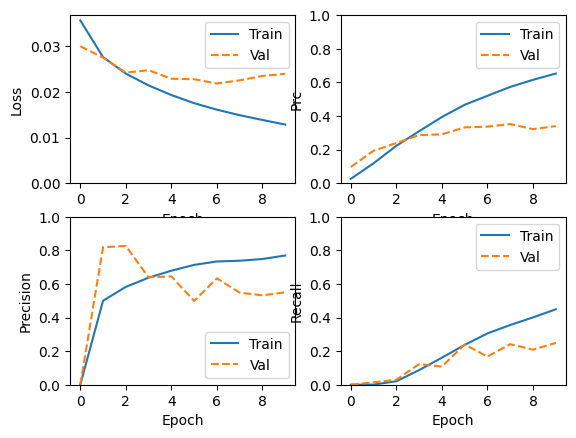

In [27]:
plot_metrics(baseline_history)

Cosine Similarity classifier.

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
# Make a neural network which simply uses the cosine similarity between the question and the answer as the prediction
def cos_sim(x, y):
    return cosine_similarity(x.reshape(1, -1), y.reshape(1, -1))[0][0]



In [31]:
from sklearn.metrics import auc, roc_curve
y_pred_keras = neural_net.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

3165/3165 [==============================] - 6s 2ms/step


In [61]:

y_pred_cos = np.asarray([cos_sim(x, y) for x, y in zip(X_test_q, X_test_c)])
# normalize the cosine similarity to be between 0 and 1
y_pred_cos = (y_pred_cos + 1)/2
fpr_cos, tpr_cos, thresholds_cos = roc_curve(y_test, y_pred_cos)
auc_cos = auc(fpr_cos, tpr_cos)

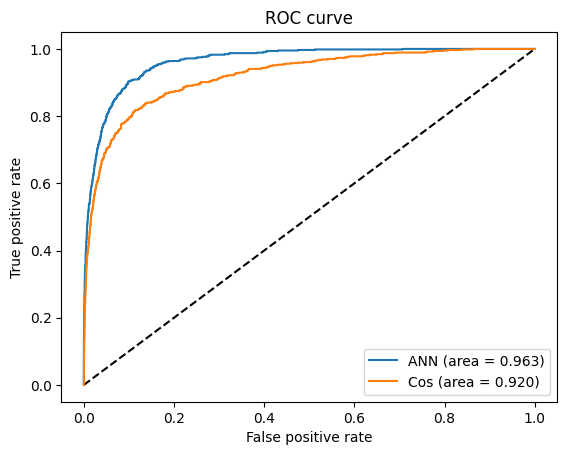

In [62]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ANN (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_cos, tpr_cos, label='Cos (area = {:.3f})'.format(auc_cos))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()